In [20]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/Users/mr04/Desktop/proyecto_pelicula/data/data.csv') #primero cargamos el dataset para ver 
# que variables tiene
data

,belongs_to_collection,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,spoken_languages,title,vote_average,vote_count,cast,crew,release_year,return
0,NaN,160000000,"['Action', 'Thriller', 'Science Fiction', 'Mys...",27205,en,29.108149,"['Legendary Pictures', 'Warner Bros.', 'Syncopy']","['United Kingdom', 'United States of America']",2010-07-14,825532764,['English'],Inception,8.1,14075.0,"['Leonardo DiCaprio', 'Joseph Gordon-Levitt', ...",['Christopher Nolan'],2010,5.159580
1,The Dark Knight Collection,185000000,"['Drama', 'Action', 'Crime', 'Thriller']",155,en,123.167259,"['DC Comics', 'Legendary Pictures', 'Warner Br...","['United Kingdom', 'United States of America']",2008-07-16,1004558444,"['English', '普通话']",The Dark Knight,8.3,12269.0,"['Christian Bale', 'Michael Caine', 'Heath Led...",['Christopher Nolan'],2008,5.430046
2,Avatar Collection,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,en,185.070892,"['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",2009-12-10,2787965087,"['English', 'Español']",Avatar,7.2,12114.0,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",['James Cameron'],2009,11.763566
3,The Avengers Collection,220000000,"['Science Fiction', 'Action', 'Adventure']",24428,en,89.887648,"['Paramount Pictures', 'Marvel Studios']",['United States of America'],2012-04-25,1519557910,['English'],The Avengers,7.4,12000.0,"['Robert Downey Jr.', 'Chris Evans', 'Mark Ruf...",['Joss Whedon'],2012,6.907081
4,Deadpool Collection,58000000,"['Action', 'Adventure', 'Comedy']",293660,en,187.860492,"['Twentieth Century Fox Film Corporation', 'Ma...",['United States of America'],2016-02-09,783112979,['English'],Deadpool,7.4,11444.0,"['Ryan Reynolds', 'Morena Baccarin', 'Ed Skrei...",['Tim Miller'],2016,13.501948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,NaN,0,"['Comedy', 'Drama']",10164,en,6.882529,['Orion Pictures'],['United States of America'],1990-05-18,27575086,"['English', 'Magyar']",Cadillac Man,5.3,54.0,"['Robin Williams', 'Tim Robbins', 'Pamela Reed...",['Roger Donaldson'],1990,0.000000
8496,NaN,10000000,['Drama'],55720,en,3.033797,"['Summit Entertainment', 'Witt/Thomas Producti...",['United States of America'],2011-06-24,1759252,"['English', 'Español']",A Better Life,7.0,54.0,"['Demián Bichir', 'José Julián', 'Chelsea Rend...",['Chris Weitz'],2011,0.175925
8497,NaN,0,['Drama'],28205,et,4.124123,"['Amrion', 'Eesti Televisioon']",['Estonia'],2007-03-16,0,['Eesti'],The Class,7.6,54.0,"['Vallo Kirs', 'Pärt Uusberg', 'Lauri Pedaja',...",['Ilmar Raag'],2007,0.000000
8498,NaN,6000000,"['Thriller', 'Drama', 'Horror', 'Mystery']",19166,en,5.499612,['Defender Production'],"['Germany', 'France', 'United Kingdom', 'Roman...",2005-01-01,0,"['Français', 'English']",House Of 9,4.9,54.0,"['Kelly Brook', 'Dennis Hopper', 'Hippolyte Gi...",['Steven R. Monroe'],2005,0.000000


Analicemos los tipos de datos que tenemos en cada columna.

In [22]:
data.dtypes 

belongs_to_collection     object
budget                     int64
genres                    object
id                         int64
original_language         object
popularity               float64
production_companies      object
production_countries      object
release_date              object
revenue                    int64
spoken_languages          object
title                     object
vote_average             float64
vote_count               float64
cast                      object
crew                      object
release_year               int64
return                   float64
dtype: object

Se observa que casi todos son de tipo objetc y el resto son float o int.

Chequeamos si hay valores nulos en el dataframe.

In [23]:
data.isnull().sum() 

belongs_to_collection    6594
budget                      0
genres                      0
id                          0
original_language           0
popularity                  0
production_companies        0
production_countries        0
release_date                0
revenue                     0
spoken_languages            0
title                       0
vote_average                0
vote_count                  0
cast                        0
crew                        0
release_year                0
return                      0
dtype: int64

Acorde a lo anterior, el unico que tiene valors nulos es belongs_to_collections.

Mientras tambien buscamos valores duplicados 

In [24]:
val_duplicados = data.duplicated() #verificamos si hay valores duplicados
val_duplicados.sum()

np.int64(19)

Hay 19 valores duplicados en el dataframe. 

In [25]:
val_duplicados = data[data.duplicated()] #buscamos cuales son los indices de los duplicados.
print(val_duplicados.index)

Index([3175, 3182, 3376, 3380, 3386, 4156, 4158, 4159, 4447, 4459, 4460, 4855,
       4880, 6421, 6499, 6824, 6829, 7036, 7051],
      dtype='int64')


In [26]:
data_sin_duplicados = data.drop_duplicates() # eliminamos los valores duplicados.

Una vez nuestra data ya esta lista empezamos algunos analisis

Realizamos una nube de palabras para ver cuales son los generos que mas repiten en la columna genres.

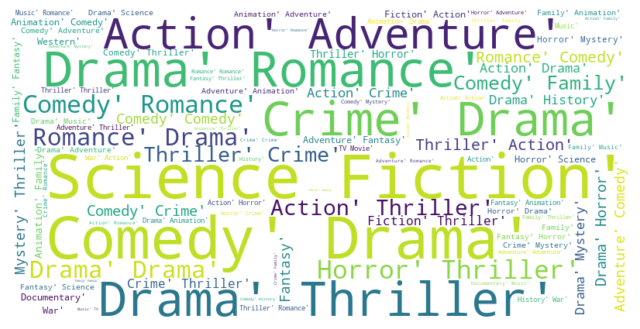

In [27]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud # importamos las librerias pertinentes

text = " ".join(data['genres'].dropna().astype(str)) #Se unen los valores de genres 

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text) #generamos el cuadro de la nube

plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()

Según lo mostrado en la nube de palabras, los generos mas repetidos para cada pelicula son Science fiction, comedy y drama.  

In [28]:
contador_drama = 0  #sacamos la cuenta de cuantas peliculas de cada uno de estos generos
for generos in data['genres']:
    if 'Drama' in generos:
        contador_drama += 1

contador_drama

3925

In [29]:
print((contador_drama/data['genres'].count())*100) # la dividimos entre el total de peliculas para ver su 
# procentaje dentro de la muestra

46.1764705882353


In [30]:
contador_science_fiction = 0

for generos in data['genres']:
    if 'Science Fiction' in generos:
        contador_science_fiction += 1

contador_science_fiction

956

In [31]:
print((contador_science_fiction/data['genres'].count())*100)

11.24705882352941


In [32]:
contador_comedy = 0

for generos in data['genres']:
    if 'Comedy' in generos:
        contador_comedy += 1

contador_comedy

3033

In [33]:
print((contador_comedy/data['genres'].count())*100)

35.68235294117647


Según los calculos anteriores en el 46.17% del total de peliculas se encuentra la clasificación Drama, un 11.24% para science fiction y un 35.68% para comedy.

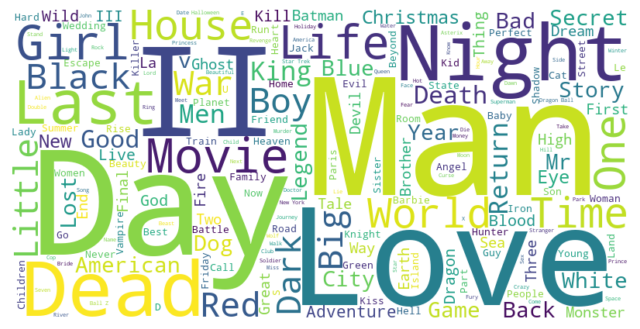

In [ ]:
from wordcloud import WordCloud 

text = " ".join(data['title'].dropna().astype(str)) 

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text) 

plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()

Esta vez hacemos el ejercicio con la columna title, viendo que todas las palabras que sobre salen son palabras cortas, lo cual podria sugerir que al nombrar una pelicula es importante la longitud de su nombre. 